#### File "ratings.dat"  format: UserID::MovieID::Rating::Timestamp
#### File "users.dat"  format: UserID::Gender::Age::Occupation::Zip-code
#### File "movies.dat"  format: MovieID::Title::Genres


In [2]:
# create three separate dataframes with rating.dat, movies.dat, user.dat files   

import pandas as pd

# convert format names to a list 
rating_names = ["UserID", "MovieID", "Rating", "Timestamp"]
movies_names = ["MovieID", "Title", "Genres"]
user_names = ["UserID", "Gender", "Age", "Occupation", "Zip-code"]



# read rating.dat, movies.dat, user.dat files:
rating_data = pd.read_table("MovieLens_1M_Dataset/ratings.dat", header=None, names = rating_names, sep= "::", encoding='ISO-8859-1')
movies_data = pd.read_table("MovieLens_1M_Dataset/movies.dat", header=None, names = movies_names, sep= "::", encoding='ISO-8859-1')
user_data = pd.read_table("MovieLens_1M_Dataset/users.dat", header=None, names = user_names, sep= "::", encoding='ISO-8859-1')

C:\Users\Saeed\AppData\Local\Temp\ipykernel_7244\173152470.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rating_data = pd.read_table("MovieLens_1M_Dataset/ratings.dat", header=None, names = rating_names, sep= "::", encoding='ISO-8859-1')
C:\Users\Saeed\AppData\Local\Temp\ipykernel_7244\173152470.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_data = pd.read_table("MovieLens_1M_Dataset/movies.dat", header=None, names = movies_names, sep= "::", encoding='ISO-8859-1')
C:\Users\Saeed\AppData\Local\Temp\ipykernel_7244\173152470.py:15: ParserWarning: Falling back to the 'python' engine beca

In [3]:
# now we create our dataframes for a better visualisation:
user_data[:2]

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072


In [4]:
rating_data[:1]

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760


In [5]:
movies_data[:3]

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance




1. **Explore the distribution of movie ratings.** How are the ratings distributed? Are there any outliers?


#### To see what are outliers:
###### https://www.youtube.com/watch?v=9aDHbRb4Bf8 
###### https://www.youtube.com/watch?v=FRlTh5HQORA&t=34s
###### https://articles.outlier.org/calculate-outlier-formula
###### https://www.freecodecamp.org/news/what-is-an-outlier-definition-and-how-to-find-outliers-in-statistics/
###### https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule

In [6]:
# Find maximum amounts of RAting columns
rating_data.loc[rating_data["Rating"] == rating_data["Rating"].max()].head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
4,1,2355,5,978824291
6,1,1287,5,978302039
7,1,2804,5,978300719
10,1,595,5,978824268


In [60]:
# rating_data.loc[rating_data["Rating"] == rating_data["Rating"].min()].head()

#### there is no outlier data, because all rating are between 1 and 5

2. **Analyze the relationship between movie ratings and user demographics.** Do different age groups or genders tend to rate movies differently?


#### first we should clean up the dataset. first we should check nan values.
#### then we should check is there is any outliers.

In [8]:
# define upper and lower bounds of outliers
IQR = user_data["Age"].quantile(0.75) - user_data["Age"].quantile(0.25)

lower = user_data["Age"].quantile(0.25) - 1.5*IQR
upper = user_data["Age"].quantile(0.75) + 1.5*IQR

In [9]:
# remove outliers 
# https://www.statology.org/or-operator-in-pandas/
# https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/#


# find outliers for age columns.
age_outliers = user_data.loc[(user_data["Age"] < lower) | (user_data["Age"] > upper) ]
age_outliers = age_outliers["UserID"]
indexAge = age_outliers.index

In [64]:
# outlier_user_ids = age_outliers["UserID"]
# movies_data = movies_data[~movies_data["UserID"].isin(outlier_user_ids)]

In [11]:

user_data.drop(indexAge , inplace=True)


In [12]:
rating_data.drop(indexAge, inplace=True)

# now our data is effected by the outliers roll(IQR)
# now we could compare rating base on ages and gender
## first we go with gender

### we want to find out which type of movies are rated by men

In [13]:
user_data[:1]

,UserID,Gender,Age,Occupation,Zip-code
2,3,M,25,15,55117


In [14]:
rating_data[:1]

,UserID,MovieID,Rating,Timestamp
2,1,914,3,978301968


In [15]:
movies_data[:1]

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy


In [16]:
# first find user id's of male users
male_user_id = user_data[user_data["Gender"] == "M"]["UserID"]
male_user_id[:2]

2    3
3    4
Name: UserID, dtype: int64

In [17]:
# now we want to find which one of ratings were for men 
male_rating = rating_data.loc[rating_data["UserID"].isin(male_user_id)]
male_rating[:2]

,UserID,MovieID,Rating,Timestamp
182,3,3421,4,978298147
183,3,1641,2,978298430


In [18]:
movies_data[:2]

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy


In [19]:
movies_male_rated = movies_data.loc[movies_data["MovieID"].isin(male_rating["MovieID"])]
movies_male_rated.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
group_movies_male_rated = movies_male_rated.groupby("Genres").describe()
group_movies_male_rated.head()

MovieID               \
                                                count         mean   
Genres                                                               
Action                                           62.0  1882.645161   
Action|Adventure                                 24.0  1797.250000   
Action|Adventure|Animation                        1.0  3000.000000   
Action|Adventure|Animation|Children's|Fantasy     1.0   558.000000   
Action|Adventure|Animation|Horror|Sci-Fi          1.0   610.000000   

                                                                             \
                                                       std     min      25%   
Genres                                                                        
Action                                         1258.686332     9.0   577.75   
Action|Adventure                               1080.292201    44.0  1021.75   
Action|Adventure|Animation                             NaN  3000.0  3000.00   
Action|Adventure|Animation|Children's|Fantasy          NaN   558.0   558.00   
Action|Adventure|Animation|Horror|Sci-Fi               NaN   610.0   610.00   

                                                                        
                                                  50%      75%     max  
Genres                                                                  
Action                                         1897.5  2989.75  3879.0  
Action|Adventure                               1643.5  2466.75  3807.0  
Action|Adventure|Animation                     3000.0  3000.00  3000.0  
Action|Adventure|Animation|Children's|Fantasy   558.0   558.00   558.0  
Action|Adventure|Animation|Horror|Sci-Fi        610.0   610.00   610.0

In [164]:
# group_movies_male_rated.loc[group_movies_male_rated["count"].isna() == True]
# why it is not working???

### Rename columns in dataframe created by groupby
#### https://stackoverflow.com/questions/19523277/renaming-column-names-in-pandas-groupby-function
#### https://datatofish.com/index-to-column-pandas-dataframe/
#### https://www.geeksforgeeks.org/indexing-and-selecting-data-with-pandas/#
#### 

In [21]:
group_movies_male_rated.columns = ["count", "mean", "std", "min", "25%", "50%", "75%", "max"]
group_movies_male_rated[:2]

,count,mean,std,min,25%,50%,75%,max
Genres,,,,,,,,
Action,62.0,1882.645161,1258.686332,9.0,577.75,1897.5,2989.75,3879.0
Action|Adventure,24.0,1797.250000,1080.292201,44.0,1021.75,1643.5,2466.75,3807.0


In [22]:
group_movies_male_rated.reset_index(inplace=True)
group_movies_male_rated = group_movies_male_rated.rename(columns = {'index':'index'})

In [23]:
group_movies_male_rated[:3]

,Genres,count,mean,std,min,25%,50%,75%,max
0,Action,62.0,1882.645161,1258.686332,9.0,577.75,1897.5,2989.75,3879.0
1,Action|Adventure,24.0,1797.250000,1080.292201,44.0,1021.75,1643.5,2466.75,3807.0
2,Action|Adventure|Animation,1.0,3000.000000,NaN,3000.0,3000.00,3000.0,3000.00,3000.0


In [24]:
error = group_movies_male_rated.loc[group_movies_male_rated["count"] <=10]
group_movies_male_rated.drop(error.index, inplace = True)
# lower_count

### i want to find top 5 most frequent Geners in dataset
##### https://www.geeksforgeeks.org/how-to-sort-pandas-dataframe/#

In [25]:
sorted_group_movies_male_rated = group_movies_male_rated.sort_values(by=['count'])

In [26]:
sorted_group_movies_male_rated.head()

,Genres,count,mean,std,min,25%,50%,75%,max
115,Adventure|Children's|Fantasy,11.0,1271.818182,1020.308269,2.0,93.0,1967.0,2102.0,2399.0
246,Drama|Musical,11.0,1595.545455,1396.271060,73.0,294.0,1416.0,2590.0,3910.0
37,Action|Adventure|Thriller,11.0,1164.818182,1007.305795,10.0,640.0,836.0,1525.5,3755.0
299,War,11.0,2201.363636,1163.459692,632.0,1105.0,2669.0,3202.5,3670.0
279,Horror|Sci-Fi|Thriller,11.0,3181.818182,1020.776745,426.0,3107.0,3662.0,3664.5,3826.0


In [27]:
top_five_male_genres = sorted_group_movies_male_rated[-1:-6:-1]
# top_five_male_genres = top_five_male_genres.drop('Genres', axis=1)
top_five_male_genres

,Genres,count,mean,std,min,25%,50%,75%,max
239,Drama,743.0,1935.641992,1159.130043,14.0,863.50,1929.0,3008.00,3951.0
176,Comedy,492.0,2078.691057,1194.949405,5.0,943.75,2253.0,3124.75,3948.0
274,Horror,175.0,2418.131429,984.839342,152.0,1870.00,2517.0,3056.00,3942.0
185,Comedy|Drama,152.0,2126.414474,1205.754088,4.0,987.00,2289.5,3213.75,3944.0
207,Comedy|Romance,136.0,1825.000000,1161.390150,3.0,672.75,1837.5,2781.75,3909.0


([<matplotlib.patches.Wedge at 0x1a6bf5436d0>,
 [Text(-0.8271914930698515, 0.7250891212760471, 'Drama'),
  Text(-0.0061055255232592915, -1.0999830555777144, 'Comedy'),
  Text(1.0361903761571174, -0.36920117058234214, 'Horror'),
  Text(1.0622545633392697, 0.2856838158959966, 'Comedy|Drama'),
  Text(0.7698622511254876, 0.7856921243667884, 'Comedy|Romance')])

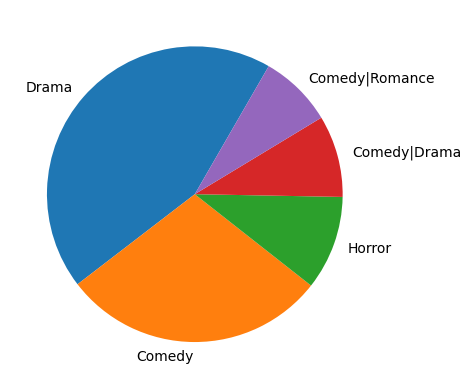

In [29]:
import matplotlib.pyplot as plt

# create data and labels
count = top_five_male_genres["count"]
label = top_five_male_genres["Genres"]

fix, ax = plt.subplots()

#  ax.rotation(60)
ax.pie(count, labels=label, startangle=60)

3. **Identify the most popular movies and genres.** Which movies have the highest average ratings? Which genres are the most popular?


In [28]:
rating_data[:2]

,UserID,MovieID,Rating,Timestamp
2,1,914,3,978301968
3,1,3408,4,978300275


In [29]:
user_data[:2]

,UserID,Gender,Age,Occupation,Zip-code
2,3,M,25,15,55117
3,4,M,45,7,02460


In [30]:
movies_data[:2]

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy


In [31]:
movie_id_group = rating_data.groupby(by="MovieID").mean()
movie_id_group[:3]

,UserID,Rating,Timestamp
MovieID,,,
1,3055.288054,4.146917,9.705549e+08
2,3027.977175,3.201141,9.717322e+08
3,2632.156904,3.016736,9.734544e+08


In [32]:
movie_id_group.reset_index(inplace=True)
movie_id_group = movie_id_group.rename(columns = {'index':'index'})
movie_id_group

,MovieID,UserID,Rating,Timestamp
0,1,3055.288054,4.146917,9.705549e+08
1,2,3027.977175,3.201141,9.717322e+08
2,3,2632.156904,3.016736,9.734544e+08
3,4,3268.841176,2.729412,9.716206e+08
4,5,3143.152027,3.006757,9.718301e+08
...,...,...,...,...
3701,3948,2063.107889,3.635731,9.822191e+08
3702,3949,2289.046053,4.115132,9.937587e+08
3703,3950,2123.370370,3.666667,9.970516e+08
3704,3951,1687.925000,3.900000,9.846545e+08


In [33]:
top_rated = movie_id_group.loc[movie_id_group["Rating"] == movie_id_group["Rating"].max()]
top_rated

,MovieID,UserID,Rating,Timestamp
744,787,1948.666667,5.0,9.741198e+08
926,989,1915.000000,5.0,9.746939e+08
1652,1830,2869.000000,5.0,9.724390e+08
2955,3172,3485.000000,5.0,9.670604e+08
3010,3233,3733.000000,5.0,9.664246e+08
3054,3280,46.000000,5.0,9.779795e+08
3152,3382,5334.000000,5.0,9.607962e+08
3367,3607,5851.000000,5.0,9.577566e+08
3414,3656,5313.000000,5.0,9.609204e+08
3635,3881,2885.000000,5.0,9.724529e+08


In [52]:
top_rated_title = movies_data.loc[movies_data["MovieID"].isin(top_rated["MovieID"])]["Title"]
top_rated_Genres = movies_data.loc[movies_data["MovieID"].isin(top_rated["MovieID"])]["Genres"]

In [53]:
top_rated_title

777            Gate of Heavenly Peace, The (1995)
977     Schlafes Bruder (Brother of Sleep) (1995)
1762                      Follow the Bitch (1998)
3103                      Ulysses (Ulisse) (1954)
3164                         Smashing Time (1967)
3211                             Baby, The (1973)
3313                       Song of Freedom (1936)
3538                     One Little Indian (1973)
3587                                 Lured (1947)
3811                     Bittersweet Motel (2000)
Name: Title, dtype: object

In [36]:
# pd.DataFrame(, , )
# Create a DataFrame object
df = pd.DataFrame()




# creating columns 'Age' and 'ID' at
# 2nd and 3rd position using
# dataframe.insert() function
df.insert(0, "Marks", top_rated["MovieID"], True)
df.insert(1, "Title", top_rated_title, True)
df.insert(2, "Genres", top_rated_Genres, True)
merged_df = top_rated.merge(top_rated_title_df, on="MovieID", how="left")
merged_df = merged_df.merge(top_rated_Genres_df, on="MovieID", how="left")

NameError: name 'top_rated_title_df' is not defined

In [37]:
df

,Marks,Title,Genres
744,787,NaN,NaN
926,989,NaN,NaN
1652,1830,NaN,NaN
2955,3172,NaN,NaN
3010,3233,NaN,NaN
3054,3280,NaN,NaN
3152,3382,NaN,NaN
3367,3607,NaN,NaN
3414,3656,NaN,NaN
3635,3881,NaN,NaN


In [38]:


# why this is not woking??
# df = pd.DataFrame(top_rated["MovieID"], top_rated_title, top_rated_Genres, columns=["MovieID", "Title", "Genres"])

In [58]:
data = {
    "MovieID": top_rated["MovieID"],
    "Title": top_rated_title,
    "Genres": top_rated_Genres
}


df = pd.DataFrame(data)

In [59]:
df
# why there is nan values in dataframe

,MovieID,Title,Genres
744,787.0,NaN,NaN
777,NaN,"Gate of Heavenly Peace, The (1995)",Documentary
926,989.0,NaN,NaN
977,NaN,Schlafes Bruder (Brother of Sleep) (1995),Drama
1652,1830.0,NaN,NaN
1762,NaN,Follow the Bitch (1998),Comedy
2955,3172.0,NaN,NaN
3010,3233.0,NaN,NaN
3054,3280.0,NaN,NaN
3103,NaN,Ulysses (Ulisse) (1954),Adventure


In [41]:
# drop the nan values



,MovieID,Title,Genres


In [44]:
# top_ten = pd.DataFrame().assign(MovieID=top_rated["MovieID"], Title=top_rated_title, Genres = top_rated_Genres)
# top_ten

,MovieID,Title,Genres
744,787,NaN,NaN
926,989,NaN,NaN
1652,1830,NaN,NaN
2955,3172,NaN,NaN
3010,3233,NaN,NaN
3054,3280,NaN,NaN
3152,3382,NaN,NaN
3367,3607,NaN,NaN
3414,3656,NaN,NaN
3635,3881,NaN,NaN
